# Install Dependencies

In [40]:
# !pip install opencv-python
# !pip install tensorflow

In [41]:
import tensorflow as tf
import os
import cv2
import imghdr

# imghdr is being removed, maybe use imagesize?

In [42]:
path = "Bone Images/Bone Break Classification/Bone Break Classification"
img_extension = "jpeg"

In [43]:
os.listdir(path)

['.DS_Store',
 'Hairline Fracture',
 'Fracture Dislocation',
 'Pathological fracture',
 'Greenstick fracture',
 'Spiral Fracture',
 'Impacted fracture',
 'Comminuted fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Avulsion fracture']

In [44]:
import numpy as np
from matplotlib import pyplot as plt

In [46]:
data = tf.keras.utils.image_dataset_from_directory(path)

Found 1129 files belonging to 10 classes.


In [47]:
data_iterator = data.as_numpy_iterator()

In [48]:
batch = data_iterator.next()

2024-02-17 21:48:12.380873: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:28: Filling up shuffle buffer (this may take a while): 61 of 256
2024-02-17 21:48:23.196931: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


In [49]:
batch[1]

array([6, 7, 4, 2, 7, 4, 8, 1, 5, 0, 7, 3, 2, 3, 4, 2, 0, 9, 9, 1, 6, 5,
       0, 3, 2, 7, 7, 9, 1, 0, 8, 9], dtype=int32)

In [148]:
labels_list = sorted(os.listdir(path))
labels_list.remove('.DS_Store')
label_dictionary = {labels_list[i]:i for i in range(len(labels_list))}
print(label_dictionary)

{'Avulsion fracture': 0, 'Comminuted fracture': 1, 'Fracture Dislocation': 2, 'Greenstick fracture': 3, 'Hairline Fracture': 4, 'Impacted fracture': 5, 'Longitudinal fracture': 6, 'Oblique fracture': 7, 'Pathological fracture': 8, 'Spiral Fracture': 9}


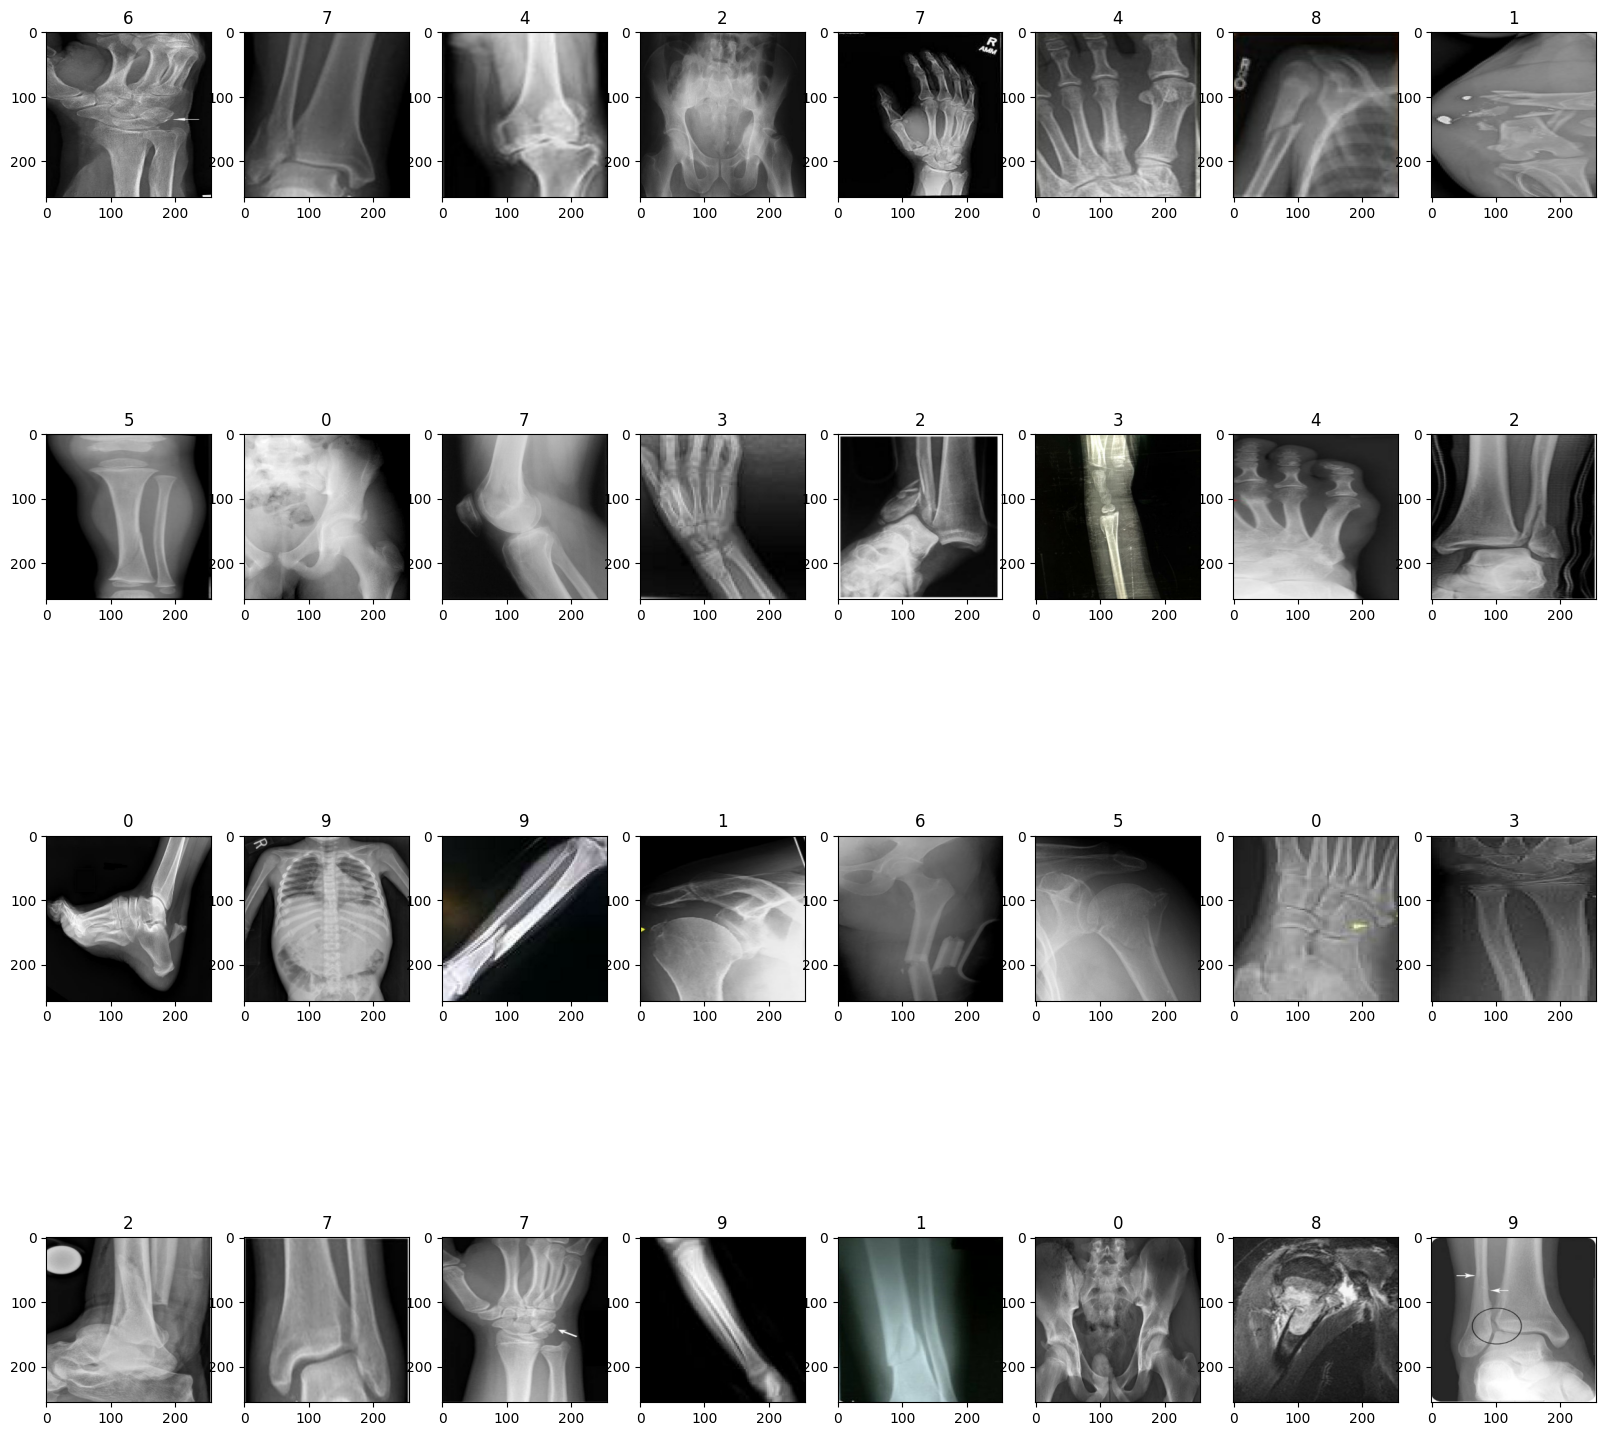

In [50]:
fig, ax = plt.subplots(nrows = 4, ncols = 8, figsize = (20,20))
rows = 0
for idx, img in enumerate(batch[0][:32]):
    ax[rows][idx % 8].imshow(img.astype(int))
    ax[rows][idx % 8].title.set_text(batch[1][idx])
    if (idx + 1) % 8 == 0:
        rows += 1

# Preprocessing

In [51]:
data = data.map(lambda x,y: (x/255,y))
scaled_iterator = data.as_numpy_iterator() # needed to check if properly scaled

# Split Data

In [52]:
len(data)

36

In [53]:
train_size = int(len(data) * .7) + 1
val_size = int(len(data) * .15)
test_size = int(len(data) * .15)

In [54]:
print(train_size)
print(val_size)
print(test_size)
print(train_size + val_size + test_size)

26
5
5
36


In [55]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Building DL Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [76]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation = 'relu', padding = 'same', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation = 'relu', padding = 'same', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation = 'softmax'))

In [77]:
model.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 131072)            0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [79]:
logdir = "Bone Classification Logs"

In [80]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [81]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
26/26 [==============================] - 25s 861ms/step - loss: 2.9064 - accuracy: 0.1334 - val_loss: 2.2759 - val_accuracy: 0.1562
Epoch 2/20
26/26 [==============================] - 21s 777ms/step - loss: 2.2743 - accuracy: 0.1587 - val_loss: 2.2763 - val_accuracy: 0.1500
Epoch 3/20
26/26 [==============================] - 21s 781ms/step - loss: 2.2277 - accuracy: 0.1971 - val_loss: 2.1984 - val_accuracy: 0.1813
Epoch 4/20
26/26 [==============================] - 23s 854ms/step - loss: 2.1358 - accuracy: 0.2212 - val_loss: 2.2068 - val_accuracy: 0.1688
Epoch 5/20
26/26 [==============================] - 23s 824ms/step - loss: 1.9821 - accuracy: 0.3101 - val_loss: 1.9955 - val_accuracy: 0.2875
Epoch 6/20
26/26 [==============================] - 22s 830ms/step - loss: 1.8029 - accuracy: 0.3654 - val_loss: 1.8563 - val_accuracy: 0.3875
Epoch 7/20
26/26 [==============================] - 22s 816ms/step - loss: 1.5374 - accuracy: 0.4916 - val_loss: 1.6085 - val_accuracy: 0.4750

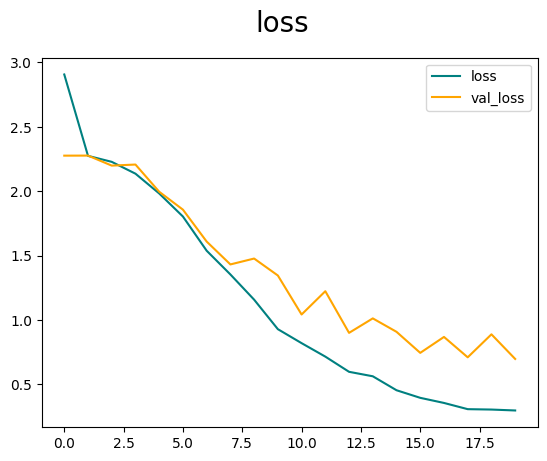

In [82]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange',label = 'val_loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

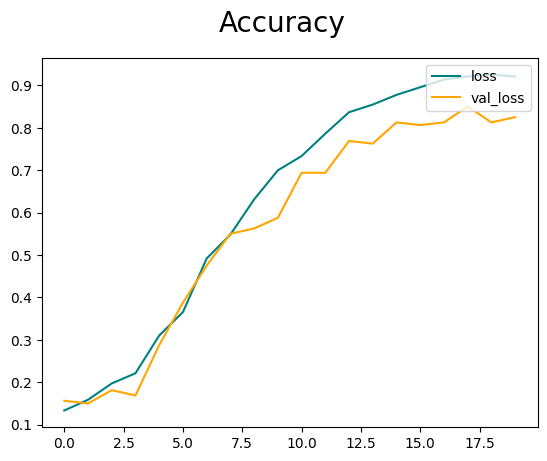

In [111]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal',label = 'loss')
plt.plot(hist.history['val_accuracy'], color = 'orange',label = 'val_loss')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

# Performance Evaluation

In [110]:
for batch in test.as_numpy_iterator():
    X,y = batch
    print(model.evaluate(X,y))

1/1 [==============================] - 0s 252ms/step - loss: 0.7955 - accuracy: 0.8438
[0.7955175638198853, 0.84375]
1/1 [==============================] - 0s 222ms/step - loss: 1.8097 - accuracy: 0.7188
[1.8097155094146729, 0.71875]
1/1 [==============================] - 0s 221ms/step - loss: 1.0585 - accuracy: 0.8125
[1.058532476425171, 0.8125]
1/1 [==============================] - 0s 249ms/step - loss: 0.5954 - accuracy: 0.8750
[0.5953933000564575, 0.875]
1/1 [==============================] - 0s 106ms/step - loss: 0.3727 - accuracy: 0.7778
[0.37266942858695984, 0.7777777910232544]


# Saving the model

In [136]:
from tensorflow.keras.models import load_model

In [139]:
model.save('models.keras')

In [143]:
model_check = tf.keras.models.load_model('models.keras')

In [146]:
model_check.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 131072)            0         
                                                                 
 dense_10 (Dense)            (None, 128)              